In [1]:
import numpy as np
from scipy.spatial.distance import cdist

In [2]:
import torch

data = torch.load('/home/xuanru/sylber/feature/ft/all/progress_16000.pt')
data = data.cpu().numpy()  # Move back to CPU for saving

print(data.shape)

(40, 768)


In [3]:
CMU_PHONEME = ["SIL", "OW", "UW", "EY", "AW", "AH", "AO", "AY", "EH", 
               "K", "NG", "F", "JH", "M", "CH", "IH", "UH", "HH",
               "L", "AA", "R", "TH", "AE", "D", "Z", "OY", "DH", 
               "IY", "B", "W", "S", "T", "SH", "ZH", "ER", "V", 
               "Y", "N", "G", "P"]

for i in range(40):
    if CMU_PHONEME[i] == 'IY':
        print(i)
        break

27


In [4]:
data[7,:] = data[5,:] + data[27,:]  # AY = 0.4AH + 0.6IY
data[3,:] = data[8,:] + data[27,:]  # EY = 0.5EH + 0.5IY
data[1,:] = data[6,:] + data[2,:]   # OW = 0.6AO + 0.4UW
data[4,:] = data[19,:] + data[2,:]  # AW = 0.7AA + 0.3UW
data[25,:] = data[6,:] + data[27,:]  # OY = 0.4AO + 0.6IY

In [7]:
distance_matrix = cdist(data, data, metric='euclidean')

# min-max norm
d_min = np.min(distance_matrix)
d_max = np.max(distance_matrix)

similarity_matrix = 1 - (distance_matrix - d_min) / (d_max - d_min)
print(similarity_matrix)
print(similarity_matrix.shape)

np.save('/home/xuanru/sylber/phn-similarity/sylber_ft/update/sylber.npy', similarity_matrix)

[[1.         0.07550366 0.21694933 ... 0.18588359 0.18102707 0.19562572]
 [0.07550366 1.         0.49488588 ... 0.08051298 0.01639875 0.04602009]
 [0.21694933 0.49488588 1.         ... 0.26670298 0.19530313 0.20378963]
 ...
 [0.18588359 0.08051298 0.26670298 ... 1.         0.20062695 0.20281704]
 [0.18102707 0.01639875 0.19530313 ... 0.20062695 1.         0.1873905 ]
 [0.19562572 0.04602009 0.20378963 ... 0.20281704 0.1873905  1.        ]]
(40, 40)


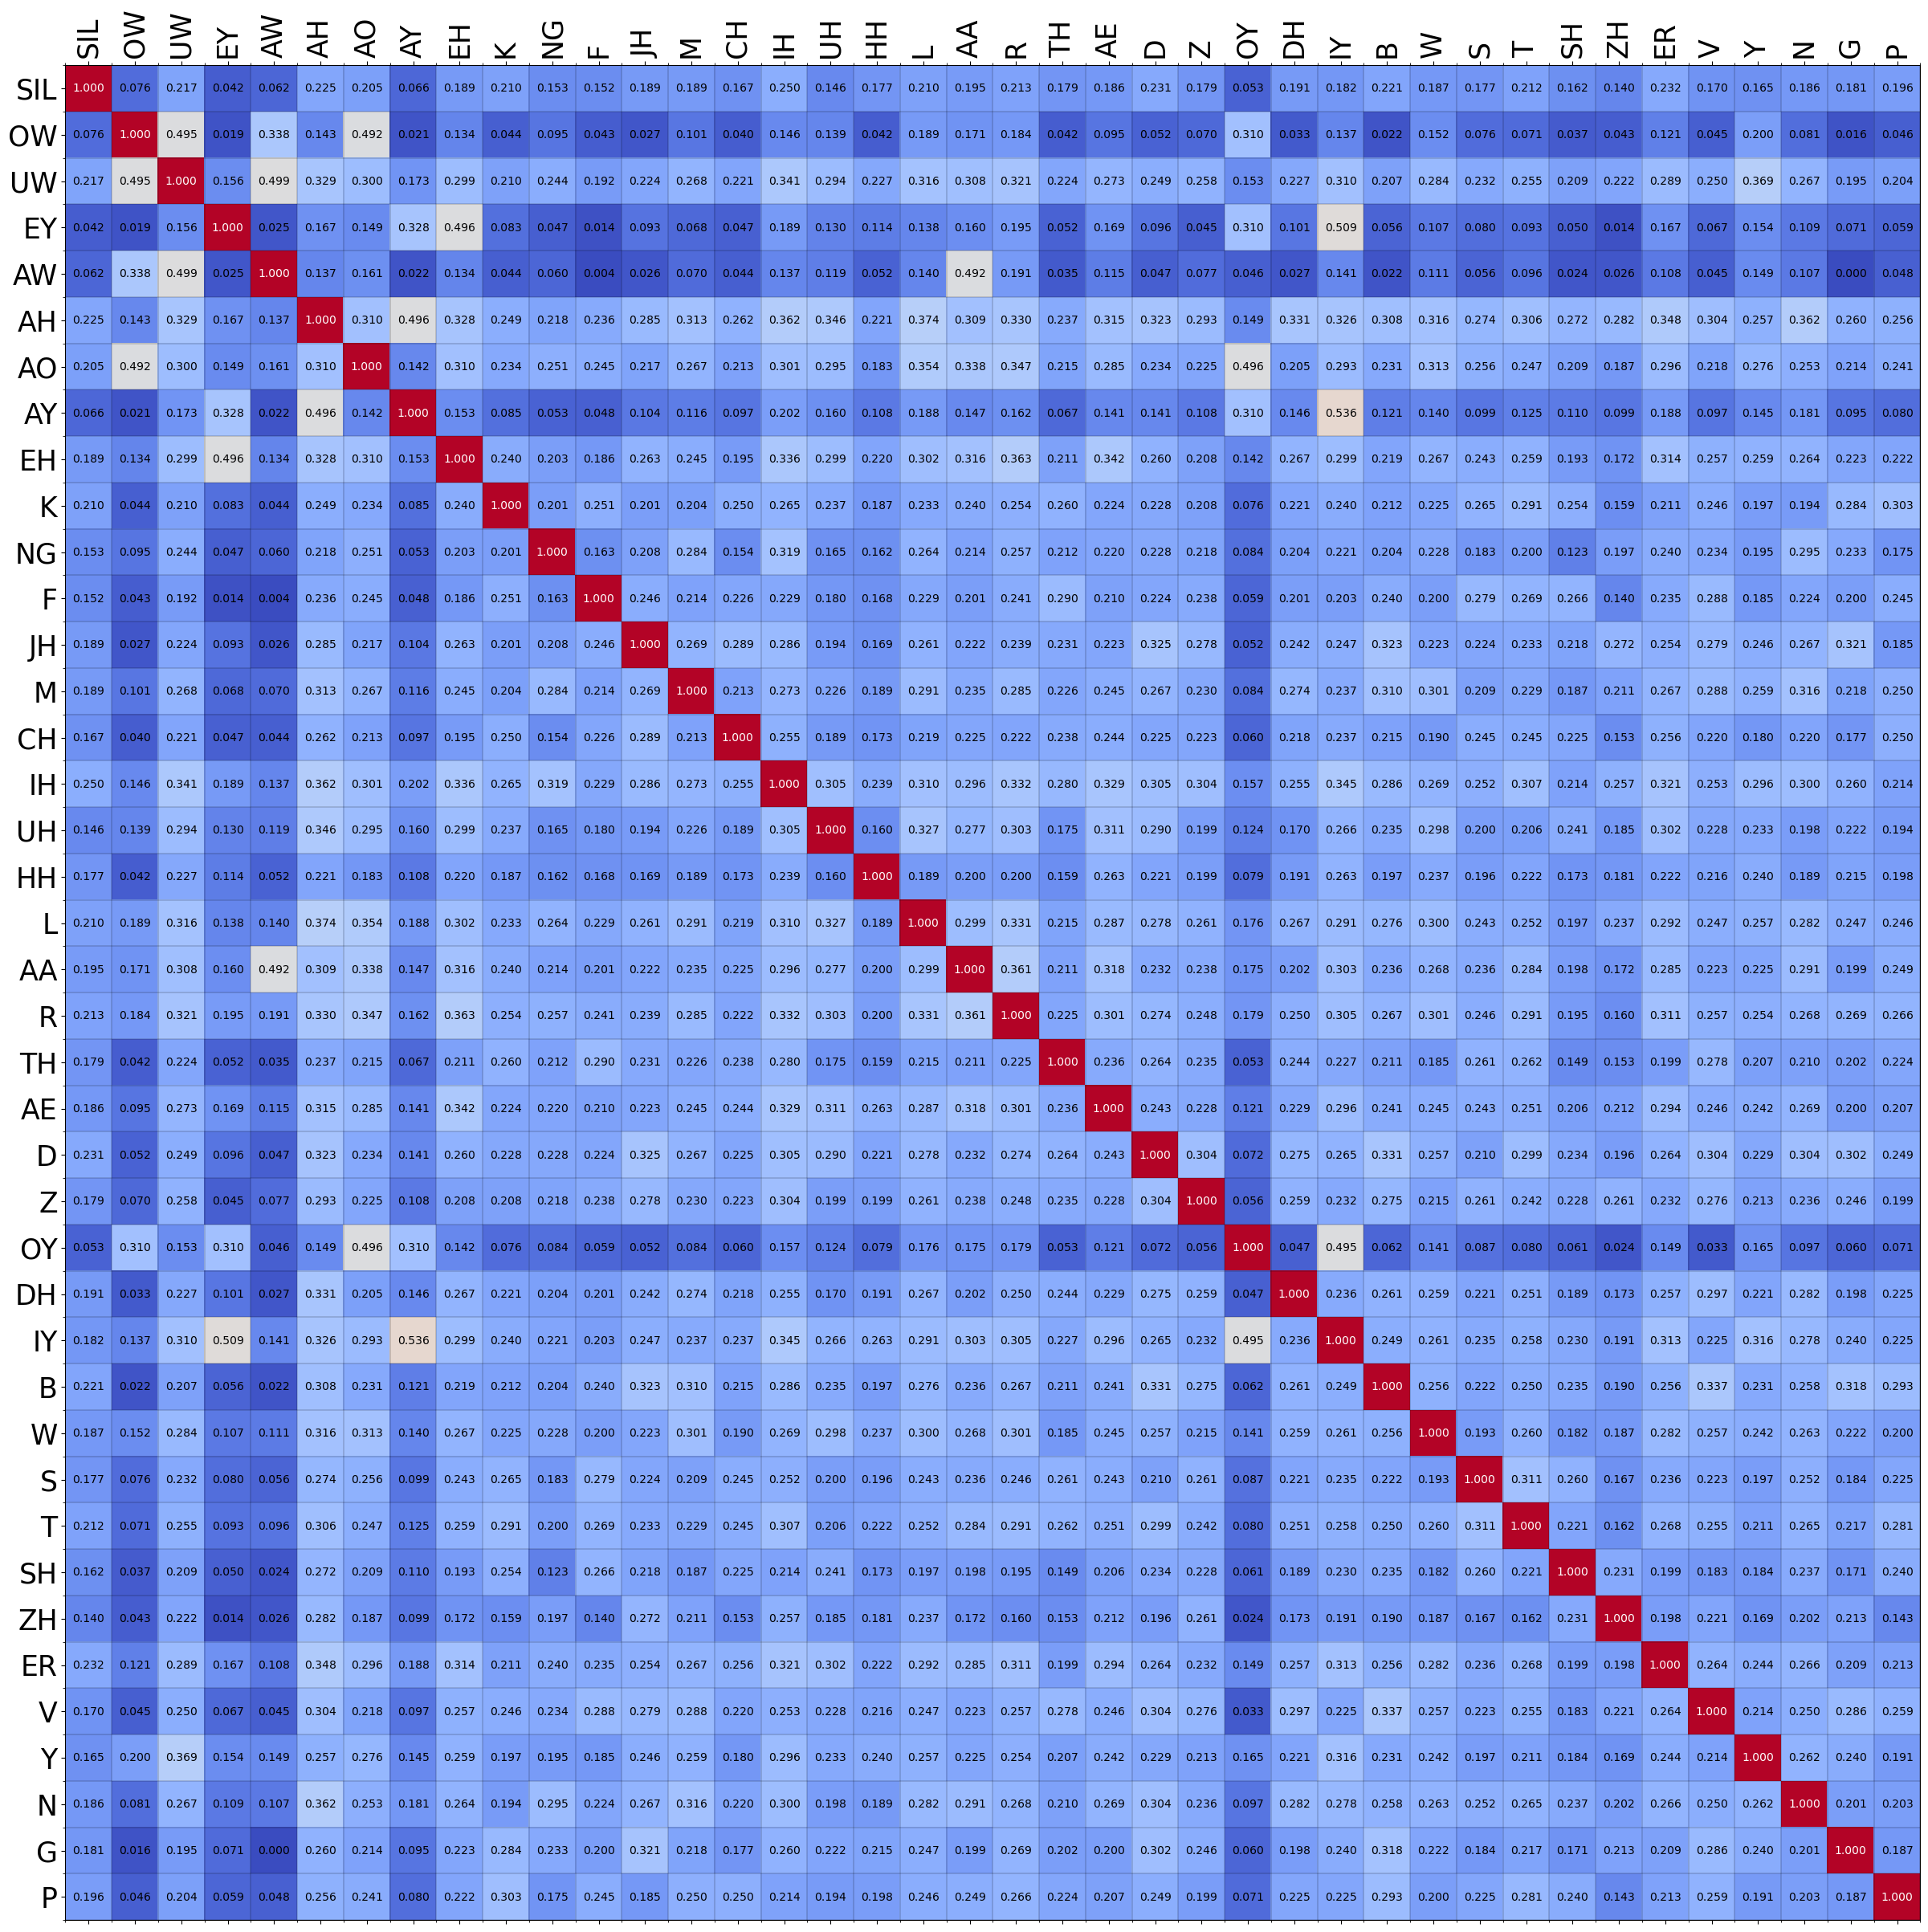

<Figure size 640x480 with 0 Axes>

In [8]:
import torch
import numpy as np
import matplotlib.pyplot as plt


CMU_PHONEME = ["SIL", "OW", "UW", "EY", "AW", "AH", "AO", "AY", "EH", 
               "K", "NG", "F", "JH", "M", "CH", "IH", "UH", "HH",
               "L", "AA", "R", "TH", "AE", "D", "Z", "OY", "DH", 
               "IY", "B", "W", "S", "T", "SH", "ZH", "ER", "V", 
               "Y", "N", "G", "P"]

fig, ax = plt.subplots(figsize=(30, 30))
cax = ax.matshow(similarity_matrix, cmap='coolwarm') 

# plt.colorbar(cax)

ax.set_xticks(np.arange(len(CMU_PHONEME)))
ax.set_yticks(np.arange(len(CMU_PHONEME)))

ax.set_xticklabels(CMU_PHONEME, fontsize=25)
ax.set_yticklabels(CMU_PHONEME, fontsize=25)

plt.xticks(rotation=90)


# 40->39
ax.set_xticks(np.arange(-.5, 40, 1), minor=True)
ax.set_yticks(np.arange(-.5, 40, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.2)

for i in range(len(CMU_PHONEME)):
    for j in range(len(CMU_PHONEME)):
        c = similarity_matrix[j,i]
        ax.text(i, j, f'{c:.3f}', va='center', ha='center', color='black' if c < 0.8 else 'white')

plt.show()
plt.savefig('/home/xuanru/sylber/phn-similarity/sylber_ft/update/sylber.jpg', format='jpg')

In [9]:
# xlsx
import pandas as pd
result = []
for row in similarity_matrix:
    top_indices = row.argsort()[-10:][::-1]
    phonemes = [CMU_PHONEME[idx] for idx in top_indices]
    result.append(phonemes)


df = pd.DataFrame(result)
df.index = [CMU_PHONEME[i] for i in range(df.shape[0])]

df.columns = [str(i + 1) for i in range(10)]

df.to_excel("/home/xuanru/sylber/phn-similarity/sylber_ft/update/top_10.xlsx", index=True, index_label="Phoneme")

## finetuned

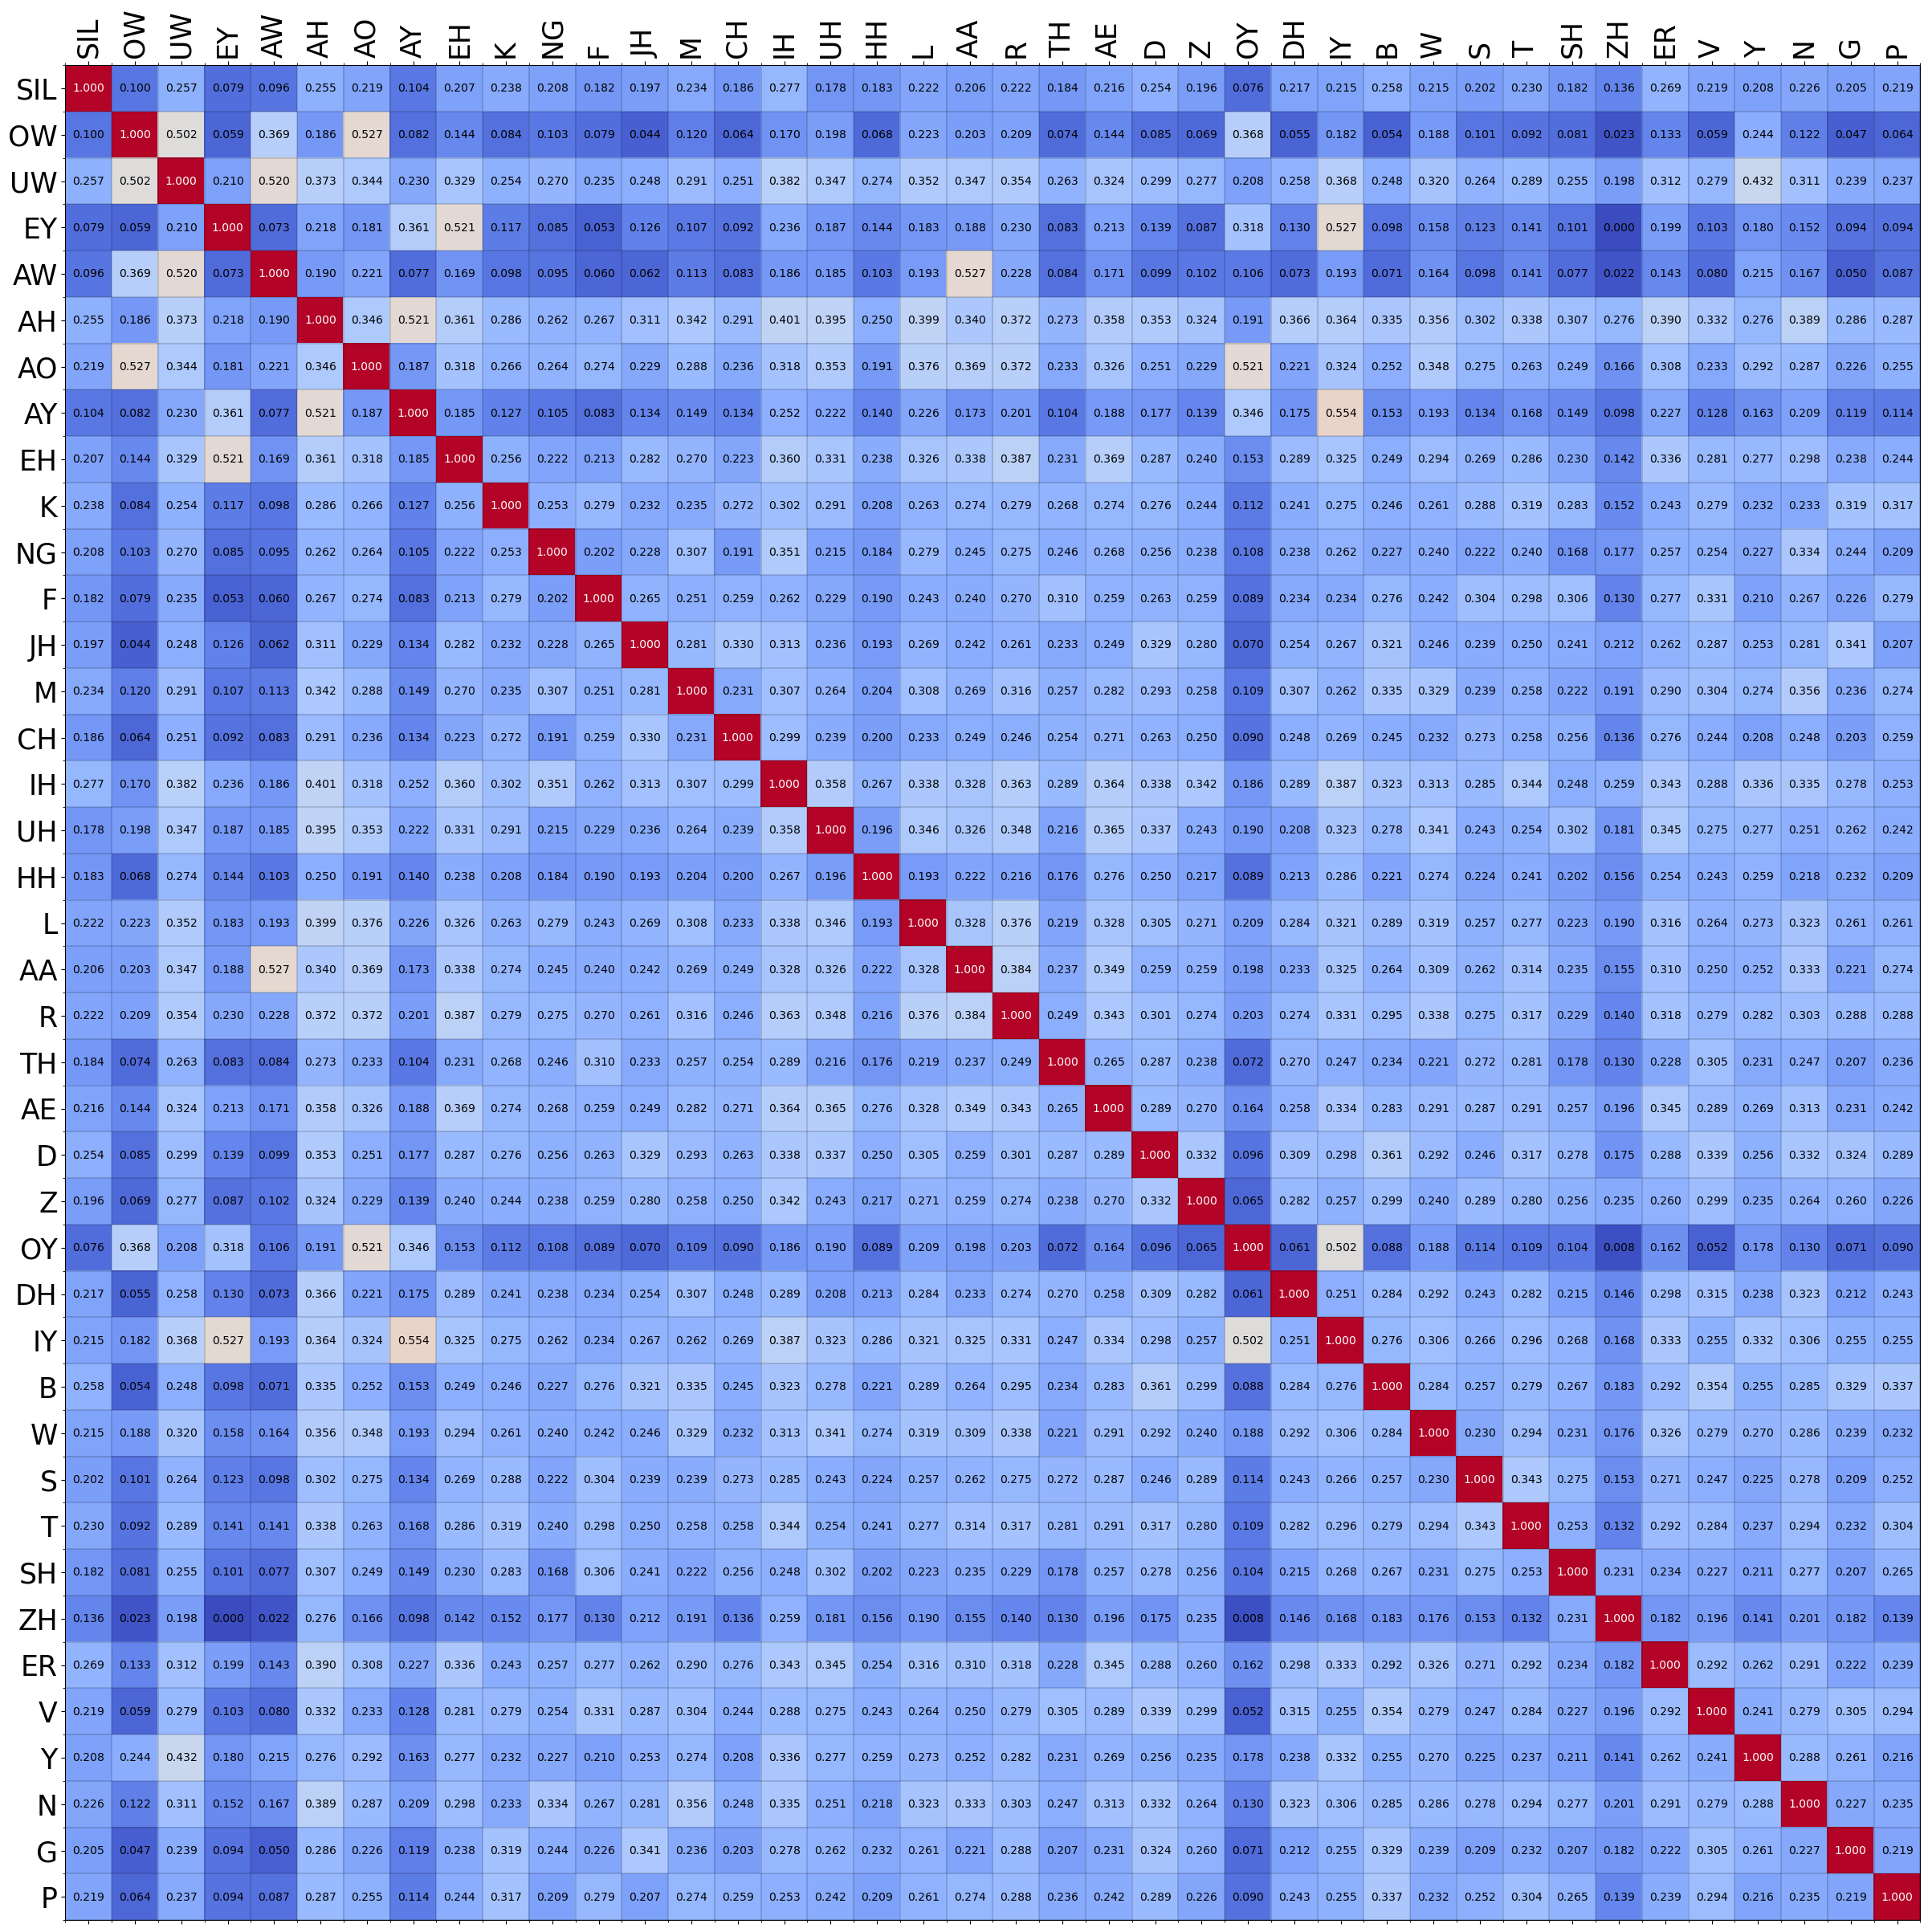

In [7]:
import torch
import numpy as np
import matplotlib.pyplot as plt


CMU_PHONEME = ["SIL", "OW", "UW", "EY", "AW", "AH", "AO", "AY", "EH", 
               "K", "NG", "F", "JH", "M", "CH", "IH", "UH", "HH",
               "L", "AA", "R", "TH", "AE", "D", "Z", "OY", "DH", 
               "IY", "B", "W", "S", "T", "SH", "ZH", "ER", "V", 
               "Y", "N", "G", "P"]

fig, ax = plt.subplots(figsize=(30, 30))
cax = ax.matshow(similarity_matrix, cmap='coolwarm') 

# plt.colorbar(cax)

ax.set_xticks(np.arange(len(CMU_PHONEME)))
ax.set_yticks(np.arange(len(CMU_PHONEME)))

ax.set_xticklabels(CMU_PHONEME, fontsize=25)
ax.set_yticklabels(CMU_PHONEME, fontsize=25)

plt.xticks(rotation=90)


# 40->39
ax.set_xticks(np.arange(-.5, 40, 1), minor=True)
ax.set_yticks(np.arange(-.5, 40, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.2)

for i in range(len(CMU_PHONEME)):
    for j in range(len(CMU_PHONEME)):
        c = similarity_matrix[j,i]
        ax.text(i, j, f'{c:.3f}', va='center', ha='center', color='black' if c < 0.8 else 'white')

plt.show()

In [9]:
# xlsx
import pandas as pd
result = []
for row in similarity_matrix:
    top_indices = row.argsort()[-10:][::-1]
    phonemes = [CMU_PHONEME[idx] for idx in top_indices]
    result.append(phonemes)


df = pd.DataFrame(result)
df.index = [CMU_PHONEME[i] for i in range(df.shape[0])]

df.columns = [str(i + 1) for i in range(10)]

df.to_excel("/home/xuanru/sylber/feature/upload/sylber.xlsx", index=True, index_label="Phoneme")

## Rule-based

In [4]:
similarity_matrix = np.load('/home/xuanru/sylber/rule_sim_matrix.npy')
print(similarity_matrix.shape)
print(similarity_matrix)

(40, 40)
[[1.         0.79166667 0.66666667 ... 0.08333333 0.08333333 0.5       ]
 [0.79166667 1.         0.75       ... 0.08333333 0.08333333 0.5       ]
 [0.66666667 0.75       1.         ... 0.08333333 0.08333333 0.5       ]
 ...
 [0.08333333 0.08333333 0.08333333 ... 1.         0.83333333 0.58333333]
 [0.08333333 0.08333333 0.08333333 ... 0.83333333 1.         0.58333333]
 [0.5        0.5        0.5        ... 0.58333333 0.58333333 1.        ]]


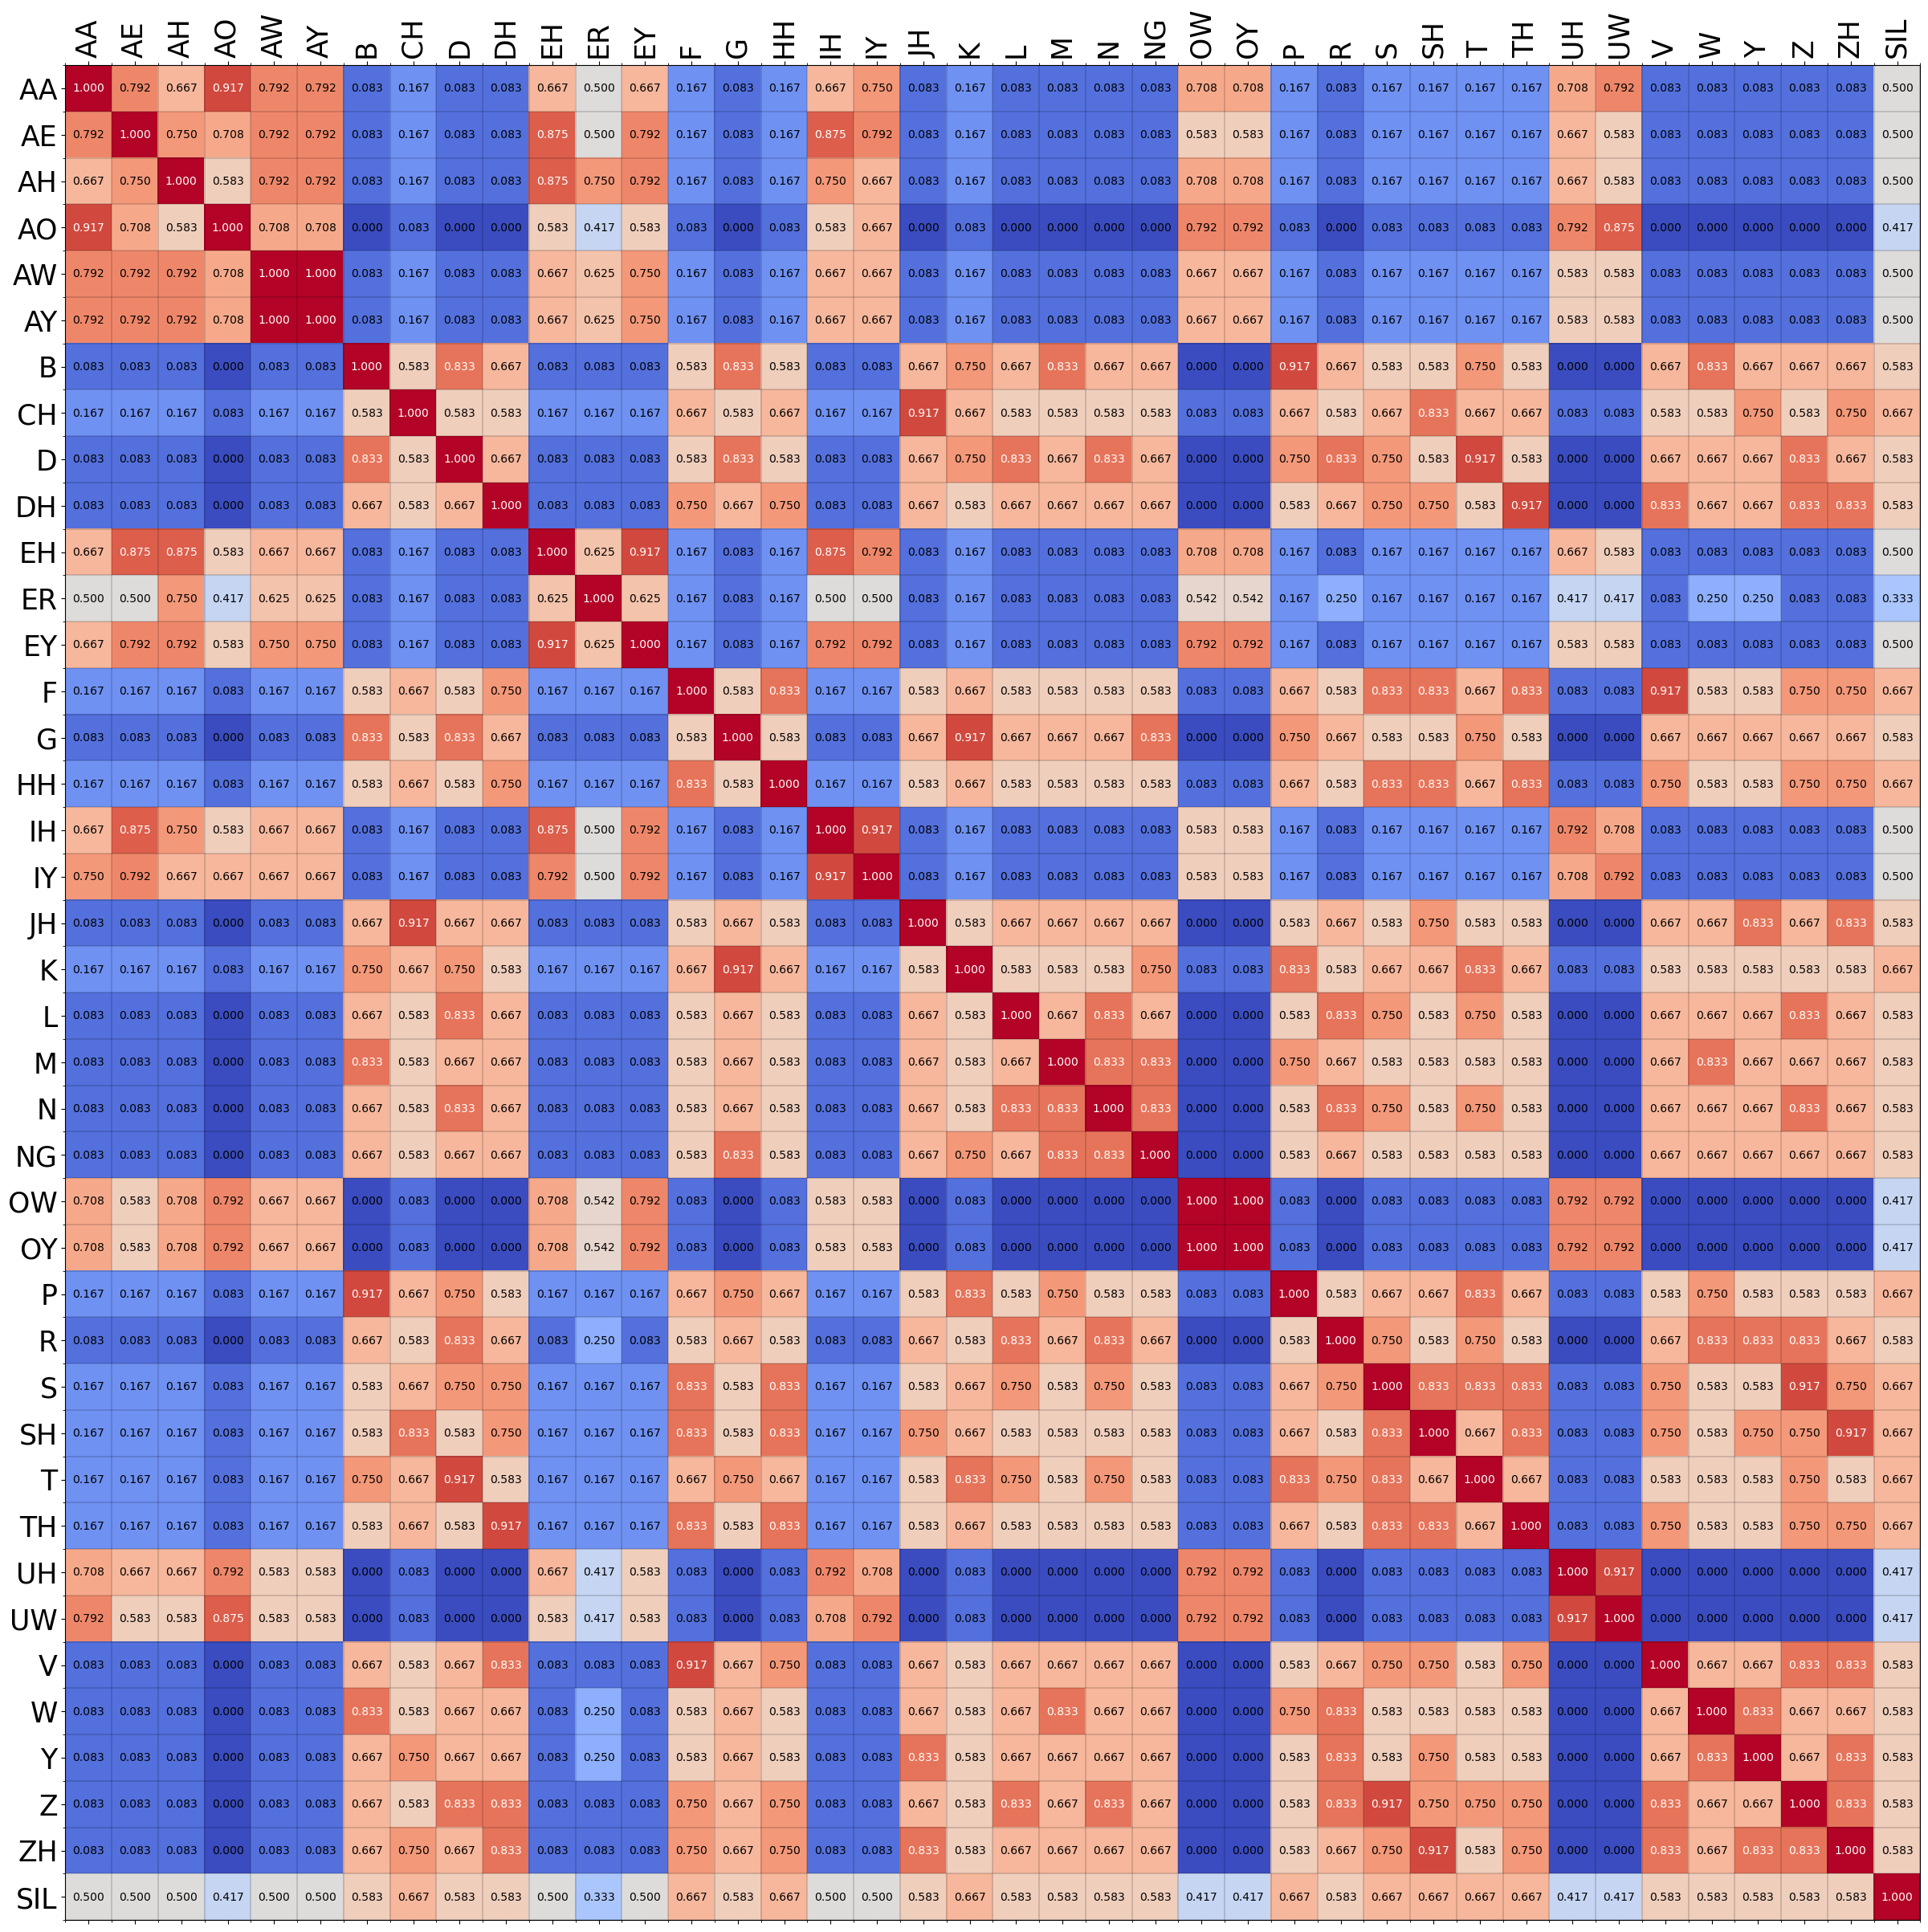

<Figure size 640x480 with 0 Axes>

In [9]:
import torch
import numpy as np
import matplotlib.pyplot as plt


CMU_PHONEME = [
    "AA", "AE", "AH", "AO", "AW", "AY", "B", "CH", "D", "DH", 
    "EH", "ER", "EY", "F", "G", "HH", "IH", "IY", "JH", "K", 
    "L", "M", "N", "NG", "OW", "OY", "P", "R", "S", "SH", 
    "T", "TH", "UH", "UW", "V", "W", "Y", "Z", "ZH", "SIL"
]

fig, ax = plt.subplots(figsize=(30, 30))
cax = ax.matshow(similarity_matrix, cmap='coolwarm') 

# plt.colorbar(cax)

ax.set_xticks(np.arange(len(CMU_PHONEME)))
ax.set_yticks(np.arange(len(CMU_PHONEME)))

ax.set_xticklabels(CMU_PHONEME, fontsize=25)
ax.set_yticklabels(CMU_PHONEME, fontsize=25)

plt.xticks(rotation=90)


# 40->39
ax.set_xticks(np.arange(-.5, 40, 1), minor=True)
ax.set_yticks(np.arange(-.5, 40, 1), minor=True)
ax.grid(which='minor', color='black', linestyle='-', linewidth=0.2)

for i in range(len(CMU_PHONEME)):
    for j in range(len(CMU_PHONEME)):
        c = similarity_matrix[j,i]
        ax.text(i, j, f'{c:.3f}', va='center', ha='center', color='black' if c < 0.8 else 'white')

plt.show()
plt.savefig('/home/xuanru/sylber/rule.jpg', format='jpg')

In [10]:
# xlsx
import pandas as pd
result = []
for row in similarity_matrix:
    top_indices = row.argsort()[-10:][::-1]
    phonemes = [CMU_PHONEME[idx] for idx in top_indices]
    result.append(phonemes)


df = pd.DataFrame(result)
df.index = [CMU_PHONEME[i] for i in range(df.shape[0])]

df.columns = [str(i + 1) for i in range(10)]

df.to_excel("/home/xuanru/sylber/rule.xlsx", index=True, index_label="Phoneme")